# Pickfu analysis 06/07

## 1. Data preprocessing and EDA

In [1]:
#install 
! pip install pandas
! pip install numpy
! pip install wordcloud
! pip install matplotlib
! pip install regex
! pip install plotly 
! pip install spacy
! pip install gensim
! pip install nltk
! pip install afinn
! pip install -U scikit-learn
! pip install seaborn
! pip install nbformat

Requirement already up-to-date: scikit-learn in /Users/cecilia/opt/miniconda3/lib/python3.8/site-packages (1.1.1)


In [1]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import string
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
import unicodedata

/Users/cecilia/opt/miniconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cecilia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


current dataset add till page 18 1/17 medea

In [233]:
#loading in the data
pickfu0611= pd.read_csv("~/Downloads/pickfu/pickfu_data0611.csv",index_col=0)
pickfu1= pd.read_csv("~/Downloads/pickfu/pickfu1.csv",index_col=0)
pickfu2= pd.read_csv("~/Downloads/pickfu/pickfu2.csv",index_col=0)
pickfu3= pd.read_csv("~/Downloads/pickfu/pickfu3.csv",index_col=0)
pickfu4= pd.read_csv("~/Downloads/pickfu/pickfu4.csv",index_col=0)
pickfu5= pd.read_csv("~/Downloads/pickfu/pickfu5.csv",index_col=0)
pickfu6= pd.read_csv("~/Downloads/pickfu/pickfu6.csv",index_col=0)
pickfu7= pd.read_csv("~/Downloads/pickfu/pickfu7.csv",index_col=0)
pickfu8= pd.read_csv("~/Downloads/pickfu/pickfu8.csv",index_col=0)
pickfu9= pd.read_csv("~/Downloads/pickfu/pickfu9.csv",index_col=0)
pickfu10= pd.read_csv("~/Downloads/pickfu/pickfu10.csv",index_col=0)
#pickfu11= pd.read_csv("~/Downloads/pickfu/pickfu11.csv",index_col=0)
#pickfu12= pd.read_csv("~/Downloads/pickfu/pickfu12.csv",index_col=0)
#pickfu13= pd.read_csv("~/Downloads/pickfu/pickfu13.csv",index_col=0)
#pickfu14= pd.read_csv("~/Downloads/pickfu/pickfu14.csv",index_col=0)
#pickfu15= pd.read_csv("~/Downloads/pickfu/pickfu15.csv",index_col=0)
#pickfu16= pd.read_csv("~/Downloads/pickfu/pickfu16.csv",index_col=0)
#pickfu17= pd.read_csv("~/Downloads/pickfu/pickfu17.csv",index_col=0)
#pickfu18= pd.read_csv("~/Downloads/pickfu/pickfu18.csv",index_col=0)

### Creating a dataframe for all the reviews

In [234]:
pickfu_r= pd.concat([pickfu0611,pickfu1,pickfu2,pickfu3,pickfu4,pickfu5,pickfu6,pickfu7,pickfu8,pickfu9,pickfu10], ignore_index=True)
pickfu_r.shape

(4042, 8)

In [235]:
pickfu_r.to_csv('~/Downloads/pickfu/pickfu_data0612.csv') 

In [232]:
pickfu_r.head()

,Gender Identity,Income Range,Racial Or Ethnic Identity,Education Level,Age Range,Favorite Mobile Gaming Genres,Mobile Gaming Frequency,Explanation
0,Male,$101k+,White,Bachelor's Degree,35-44,Racing; Arcade; Board; Adventure; Action,Daily,This character has the most sinister and deadl...
1,Male,$31-60k,Asian,Bachelor's Degree,35-44,Action; Arcade; Role Playing; Sports,Daily,D is the character design that I think fits th...
2,Male,$31-60k,White,Bachelor's Degree,25-34,Sports; Strategy; Arcade; Adventure; Action,Daily,the character in option B has the most matchin...
3,Male,$0-30k,Hispanic,Vocational Training,25-34,Strategy; Role Playing; Action,Never,This outfit seems the most fitting to his pers...
4,Male,$61-100k,Asian,Bachelor's Degree,21-24,Educational,Daily,The picture is best fit with the the descripti...


In [203]:
pickfu_r["Explanation"]= pickfu_r["Explanation"].str.lower()

In [204]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [205]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

pickfu_r['review_punct'] = pickfu_r["Explanation"].apply(lambda x: remove_punct(x))
pickfu_r['review_punct'].head(5)

0    this character has the most sinister and deadl...
1    d is the character design that i think fits th...
2    the character in option b has the most matchin...
3    this outfit seems the most fitting to his pers...
4    the picture is best fit with the the descripti...
Name: review_punct, dtype: object

In [206]:
# then do tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

pickfu_r['review_tokenized'] = pickfu_r['review_punct'].apply(lambda x: tokenization(x))
pickfu_r.head(5)

,Gender Identity,Income Range,Racial Or Ethnic Identity,Education Level,Age Range,Favorite Mobile Gaming Genres,Mobile Gaming Frequency,Explanation,review_punct,review_tokenized
0,Male,$101k+,White,Bachelor's Degree,35-44,Racing; Arcade; Board; Adventure; Action,Daily,this character has the most sinister and deadl...,this character has the most sinister and deadl...,"[this, character, has, the, most, sinister, an..."
1,Male,$31-60k,Asian,Bachelor's Degree,35-44,Action; Arcade; Role Playing; Sports,Daily,d is the character design that i think fits th...,d is the character design that i think fits th...,"[d, is, the, character, design, that, i, think..."
2,Male,$31-60k,White,Bachelor's Degree,25-34,Sports; Strategy; Arcade; Adventure; Action,Daily,the character in option b has the most matchin...,the character in option b has the most matchin...,"[the, character, in, option, b, has, the, most..."
3,Male,$0-30k,Hispanic,Vocational Training,25-34,Strategy; Role Playing; Action,Never,this outfit seems the most fitting to his pers...,this outfit seems the most fitting to his pers...,"[this, outfit, seems, the, most, fitting, to, ..."
4,Male,$61-100k,Asian,Bachelor's Degree,21-24,Educational,Daily,the picture is best fit with the the descripti...,the picture is best fit with the the descripti...,"[the, picture, is, best, fit, with, the, the, ..."


In [207]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
pickfu_r['review_nonstop'] = pickfu_r['review_tokenized'].apply(lambda x: remove_stopwords(x))
pickfu_r.head(5)

,Gender Identity,Income Range,Racial Or Ethnic Identity,Education Level,Age Range,Favorite Mobile Gaming Genres,Mobile Gaming Frequency,Explanation,review_punct,review_tokenized,review_nonstop
0,Male,$101k+,White,Bachelor's Degree,35-44,Racing; Arcade; Board; Adventure; Action,Daily,this character has the most sinister and deadl...,this character has the most sinister and deadl...,"[this, character, has, the, most, sinister, an...","[character, sinister, deadly, look, due, weapo..."
1,Male,$31-60k,Asian,Bachelor's Degree,35-44,Action; Arcade; Role Playing; Sports,Daily,d is the character design that i think fits th...,d is the character design that i think fits th...,"[d, is, the, character, design, that, i, think...","[character, design, think, fits, description, ..."
2,Male,$31-60k,White,Bachelor's Degree,25-34,Sports; Strategy; Arcade; Adventure; Action,Daily,the character in option b has the most matchin...,the character in option b has the most matchin...,"[the, character, in, option, b, has, the, most...","[character, option, b, matching, description, ..."
3,Male,$0-30k,Hispanic,Vocational Training,25-34,Strategy; Role Playing; Action,Never,this outfit seems the most fitting to his pers...,this outfit seems the most fitting to his pers...,"[this, outfit, seems, the, most, fitting, to, ...","[outfit, seems, fitting, personality, well, us..."
4,Male,$61-100k,Asian,Bachelor's Degree,21-24,Educational,Daily,the picture is best fit with the the descripti...,the picture is best fit with the the descripti...,"[the, picture, is, best, fit, with, the, the, ...","[picture, best, fit, description, inside, attr..."


In [208]:
pickfu_r_text_review = pickfu_r['review_nonstop']
pickfu_r_text_review = pickfu_r_text_review.to_string().split(",")
#pickfu_r_text_review

#### print the most common words


OK. The 30 most common words are as follows

 like :  694
 option :  615
 looks :  568
 c :  457
 b :  449
 best :  349
 look :  339
 character :  266
 choice :  213
 style :  184
 characters :  179
 would :  163
 e :  160
 think :  158
 realistic :  144
 design :  121
 seems :  120
 first :  117
 really :  110
 fits :  109
 one :  105
 art :  102
 game :  90
 makes :  89
 feel :  76
 choices :  73
 top :  73
 attractive :  71
 seem :  69
 based :  67


<AxesSubplot:xlabel='Word'>

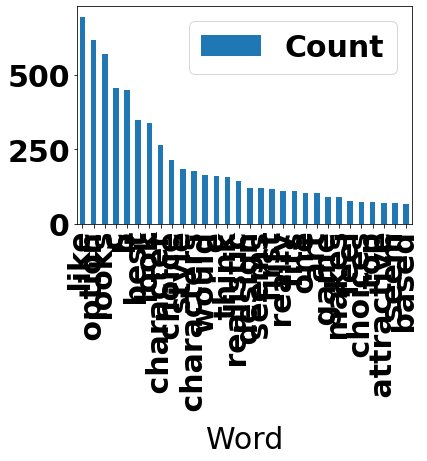

In [209]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(pickfu_r_text_review)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

#### removing additional words

In [210]:
non_sense_word = ["a","b","c","d","e","f","g","h","i","always","get","good","great","love","everything","like","one","lot","best","nice","went","people","really","need","dont",
"think","feel","option","choice","really","look","liked","seem","looks","makes","well","seems","sound","options","prefer","sounds","choices","first","second","third","would","also","much","two","less","ones","could","overall"]
def remove_nonsense(text):
    text = [word for word in text if word not in non_sense_word]
    return text
    
pickfu_r['review_nonsense'] = pickfu_r['review_nonstop'].apply(lambda x: remove_nonsense(x))
pickfu_r.head(5)

,Gender Identity,Income Range,Racial Or Ethnic Identity,Education Level,Age Range,Favorite Mobile Gaming Genres,Mobile Gaming Frequency,Explanation,review_punct,review_tokenized,review_nonstop,review_nonsense
0,Male,$101k+,White,Bachelor's Degree,35-44,Racing; Arcade; Board; Adventure; Action,Daily,this character has the most sinister and deadl...,this character has the most sinister and deadl...,"[this, character, has, the, most, sinister, an...","[character, sinister, deadly, look, due, weapo...","[character, sinister, deadly, due, weaponry, s..."
1,Male,$31-60k,Asian,Bachelor's Degree,35-44,Action; Arcade; Role Playing; Sports,Daily,d is the character design that i think fits th...,d is the character design that i think fits th...,"[d, is, the, character, design, that, i, think...","[character, design, think, fits, description, ...","[character, design, fits, description, charact..."
2,Male,$31-60k,White,Bachelor's Degree,25-34,Sports; Strategy; Arcade; Adventure; Action,Daily,the character in option b has the most matchin...,the character in option b has the most matchin...,"[the, character, in, option, b, has, the, most...","[character, option, b, matching, description, ...","[character, matching, description, olive, drab..."
3,Male,$0-30k,Hispanic,Vocational Training,25-34,Strategy; Role Playing; Action,Never,this outfit seems the most fitting to his pers...,this outfit seems the most fitting to his pers...,"[this, outfit, seems, the, most, fitting, to, ...","[outfit, seems, fitting, personality, well, us...","[outfit, fitting, personality, using, sniper, ..."
4,Male,$61-100k,Asian,Bachelor's Degree,21-24,Educational,Daily,the picture is best fit with the the descripti...,the picture is best fit with the the descripti...,"[the, picture, is, best, fit, with, the, the, ...","[picture, best, fit, description, inside, attr...","[picture, fit, description, inside, attractive..."


In [211]:
pickfu_r_text_review = pickfu_r['review_nonsense']
pickfu_r_text_review = pickfu_r_text_review.to_string().split(",")


OK. The 30 most common words are as follows

 character :  275
 style :  195
 characters :  155
 realistic :  147
 game :  144
 design :  131
 looking :  98
 fits :  96
 description :  96
 cool :  89
 zombie :  81
 based :  77
 art :  76
 fun :  75
 top :  74
 see :  72
 zombies :  69
 little :  68
 unique :  67
 better :  66
 interesting :  66
 bit :  66
 fit :  64
 attractive :  64
 outfit :  61
 colors :  59
 world :  58
 background :  54
 color :  51
 image :  50


<AxesSubplot:xlabel='Word'>

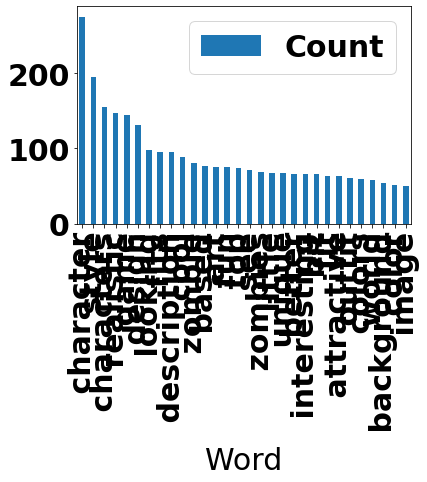

In [212]:
# Print most common word

n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(pickfu_r_text_review)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### topic modelling

#### character

In [213]:
pickfu_r['character'] = pickfu_r['Explanation'].str.contains('character')
character = pickfu_r.loc[pickfu_r['character'] == True]
character2 = character['review_nonsense'].to_string().split(",")

In [186]:
character2

['0       [character',
 ' sinister',
 ' deadly',
 ' due',
 ' weaponry',
 ' s...\n1       [character',
 ' design',
 ' fits',
 ' description',
 ' charact...\n2       [character',
 ' matching',
 ' description',
 ' olive',
 ' drab...\n12      [way',
 ' character',
 ' socially',
 ' anxious',
 ' based',
 ' wea...\n13      [character',
 ' dressed',
 ' way',
 ' resembles',
 ' biologica...\n17      [envision',
 ' character',
 ' type',
 ' personality',
 ' someb...\n18      [design',
 ' four',
 ' design',
 ' better',
 ' others',
 ' cant',
 ' s...\n19      [white',
 ' outfit',
 ' stood',
 ' made',
 ' character',
 ' intere...\n21      [sure',
 ' fit',
 ' characters',
 ' anxious',
 ' sure',
 ' relevan...\n23      [order',
 ' preferred',
 ' characters',
 ' guys',
 ' take',
 ' car...\n27      [thought',
 ' description',
 ' professor',
 ' matched',
 ' cha...\n30      [character',
 ' descritptions',
 ' personality',
 ' traits...\n32      [outfit',
 ' character',
 ' fits',
 ' description',
 ' white',
 ' 

In [214]:
bigrams_series= (pd.Series(nltk.ngrams(character2
                       , 2)).value_counts())[:30]
bigrams_series

( character,  design)         16
( art,  style)                16
( style,  characters)          8
( based,  character)           7
( fits,  description)          7
( character,  description)     6
( mobile,  game)               6
( design,  characters)         6
( fits,  character)            5
( fun,  play)                  5
( looking,  characters)        5
( characters,  fun)            5
( style,  character)           5
( character,  character)       5
( female,  characters)         4
( real,  life)                 4
( description,  character)     4
( character,  looked)          4
( style,  realistic)           4
( character,  reminds)         4
( design,  character)          4
( decisions,  based)           4
( looking,  character)         4
( interesting,  character)     4
( based,  upon)                4
( video,  game)                3
( character,  top)             3
( design,  fits)               3
( fit,  description)           3
( side,  side)                 3
dtype: int

In [215]:
trigrams_series = (pd.Series(nltk.ngrams(character2
                       , 3)).value_counts())[:30]
# n-grams 3
trigrams_series

( based,  upon,  characters)                                         3
( decisions,  based,  upon)                                          3
( fight,  side,  side)                                               3
( defense,  mobile,  game)                                           3
( design,  character,  visually)                                     2
( games,  character,  designs)                                       2
( character,  fits,  description)                                    2
( based,  character,  looked)                                        2
( character,  strong,  determined)                                   2
( character,  designs,  help)                                        2
( character,  back,  story)                                          2
( close,  together,  characters)                                     2
( character,  intimidating,  strong)                                 2
( art,  character,  design)                                          2
( back


OK. The 30 most common words are as follows

 character :  275
 characters :  155
 style :  81
 design :  61
 realistic :  44
 game :  34
 description :  33
 fits :  31
 unique :  31
 art :  31
 based :  30
 looking :  28
 cool :  26
 designs :  24
 better :  23
 fun :  23
 outfit :  20
 fit :  19
 appealing :  19
 little :  19
 interesting :  19
 story :  19
 attractive :  19
 play :  19
 see :  15
 real :  14
 strong :  14
 bit :  14
 weapons :  14
 tough :  13


<AxesSubplot:xlabel='Word'>

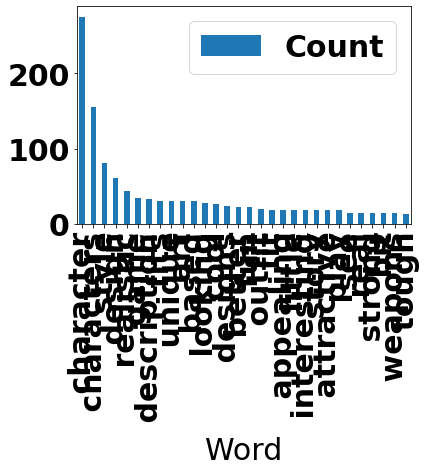

In [216]:
# Print most common word

n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(character2)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

#### style

In [217]:
pickfu_r['style'] = pickfu_r['Explanation'].str.contains('style')
style = pickfu_r.loc[pickfu_r['style'] == True]
style2 = style['review_nonsense'].to_string().split(",")

In [218]:
bigrams_series= (pd.Series(nltk.ngrams(style2
                       , 2)).value_counts())[:30]
bigrams_series

( art,  style)              38
( mobile,  game)             9
( style,  characters)        8
( style,  realistic)         7
( style,  better)            6
( unique,  style)            5
( style,  character)         5
( style,  fits)              4
( fits,  imagination)        4
( defense,  mobile)          4
( fits,  style)              4
( pretty,  cool)             3
( design,  style)            3
( style,  bit)               3
( realistic,  style)         3
( style,  little)            3
( game,  styles)             3
( font,  style)              3
( character,  design)        3
( fun,  play)                2
( style,  adds)              2
( character,  art)           2
( style,  fun)               2
( visually,  appealing)      2
( design,  styles)           2
( style,  design)            2
( game,  art)                2
( style,  art)               2
( together,  characters)     2
( tower,  defense)           2
dtype: int64

In [219]:
trigrams_series = (pd.Series(nltk.ngrams(style2
                       , 3)).value_counts())[:30]
# n-grams 3
trigrams_series

( defense,  mobile,  game)                                           4
( art,  style,  realistic)                                           3
( art,  style,  better)                                              2
( design,  font,  style)                                             2
( tower,  defense,  mobile)                                          2
( design,  fits,  description)                                       2
( close,  together,  characters)                                     2
( mobile,  game,  styles)                                            2
( fun,  art,  style)                                                 2
( style,  fits,  imagination)                                        2
( vibes,  style,  ...\n3347                               [style)    1
( visually...\n1670    [little,  better,  average)                   1
( imp...\n1377    [tend,  realistic,  gritty)                        1
( zomb...\n1777    [characters,  go,  together)                      1
( dete


OK. The 30 most common words are as follows

 style :  195
 art :  52
 character :  37
 realistic :  34
 characters :  29
 design :  24
 game :  24
 styles :  18
 unique :  18
 fits :  17
 cool :  15
 better :  15
 bit :  14
 fun :  14
 colors :  11
 mobile :  10
 see :  9
 designs :  7
 appealing :  7
 pretty :  7
 detailed :  7
 fit :  7
 zombie :  7
 image :  6
 real :  6
 shows :  6
 play :  6
 looking :  6
 zombies :  6
 dressed :  6


<AxesSubplot:xlabel='Word'>

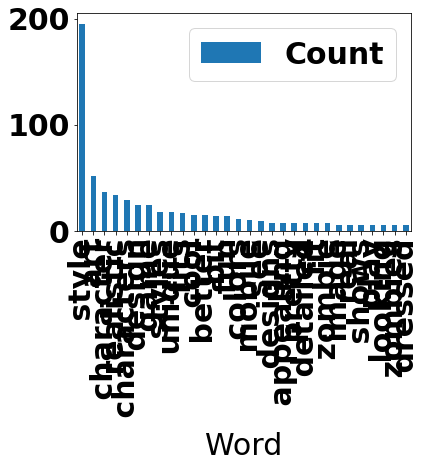

In [220]:
# Print most common word

n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(style2)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

#### design

In [221]:
pickfu_r['design'] = pickfu_r['Explanation'].str.contains('design')
design = pickfu_r.loc[pickfu_r['design'] == True]
design2 = style['review_nonsense'].to_string().split(",")

In [222]:
bigrams_series= (pd.Series(nltk.ngrams(style2
                       , 2)).value_counts())[:30]
bigrams_series

( art,  style)              38
( mobile,  game)             9
( style,  characters)        8
( style,  realistic)         7
( style,  better)            6
( unique,  style)            5
( style,  character)         5
( style,  fits)              4
( fits,  imagination)        4
( defense,  mobile)          4
( fits,  style)              4
( pretty,  cool)             3
( design,  style)            3
( style,  bit)               3
( realistic,  style)         3
( style,  little)            3
( game,  styles)             3
( font,  style)              3
( character,  design)        3
( fun,  play)                2
( style,  adds)              2
( character,  art)           2
( style,  fun)               2
( visually,  appealing)      2
( design,  styles)           2
( style,  design)            2
( game,  art)                2
( style,  art)               2
( together,  characters)     2
( tower,  defense)           2
dtype: int64

#### outfit

In [223]:
pickfu_r['outfit'] = pickfu_r['Explanation'].str.contains('outfit')
outfit = pickfu_r.loc[pickfu_r['outfit'] == True]
outfit2 = outfit['review_nonsense'].to_string().split(",")

In [224]:
bigrams_series= (pd.Series(nltk.ngrams(outfit2
                       , 2)).value_counts())[:30]
bigrams_series

( hair,  outfit)                           4
( outfit,  wearing)                        3
( attractive,  outfit)                     3
( outfit,  fits)                           2
( outfit,  designs)                        2
( outfit,  description)                    2
( sexy,  outfit)                           2
( character,  attractive)                  2
( close,  together)                        2
( art,  design)                            2
( fits,  description)                      2
( characters,  outfit)                     2
( fitting,  description)                   2
( color,  outfit)                          2
( outfit,  nicely)                         2
( outfit,  hair)                           2
( character,  character)                   2
( creature,  shown)                        2
( together,  characters)                   2
( attractive,  sexy)                       2
( design,  outfit)                         2
( outfit,  make)                           2
( strong, 

In [225]:
# Print most common word

n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(outfit2)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)


OK. The 30 most common words are as follows

 outfit :  61
 character :  23
 outfits :  14
 attractive :  14
 description :  13
 fits :  10
 hair :  10
 characters :  8
 wearing :  7
 fitting :  6
 person :  6
 face :  6
 design :  6
 based :  6
 sexy :  5
 cool :  5
 style :  5
 realistic :  5
 image :  4
 tattoos :  4
 pose :  4
 fit :  4
 real :  4
 looking :  4
 color :  4
 powerful :  3
 assassin :  3
 strong :  3
 close :  3
 modern :  3


#### color

In [226]:
pickfu_r['color'] = pickfu_r['Explanation'].str.contains('color')
color = pickfu_r.loc[pickfu_r['color'] == True]
color2 = outfit['review_nonsense'].to_string().split(",")

In [227]:
bigrams_series= (pd.Series(nltk.ngrams(color2
                       , 2)).value_counts())[:30]
bigrams_series

( hair,  outfit)                           4
( outfit,  wearing)                        3
( attractive,  outfit)                     3
( outfit,  fits)                           2
( outfit,  designs)                        2
( outfit,  description)                    2
( sexy,  outfit)                           2
( character,  attractive)                  2
( close,  together)                        2
( art,  design)                            2
( fits,  description)                      2
( characters,  outfit)                     2
( fitting,  description)                   2
( color,  outfit)                          2
( outfit,  nicely)                         2
( outfit,  hair)                           2
( character,  character)                   2
( creature,  shown)                        2
( together,  characters)                   2
( attractive,  sexy)                       2
( design,  outfit)                         2
( outfit,  make)                           2
( strong, 

#### wordcloud

In [114]:
word_cloud = pickfu_r['review_nonsense']
word_cloud = word_cloud.dropna()
#word_cloud = word_cloud.values.tolist()

In [115]:
# Function to convert  
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

#word_cloud = listToString(word_cloud)
word_cloud = word_cloud.to_string()

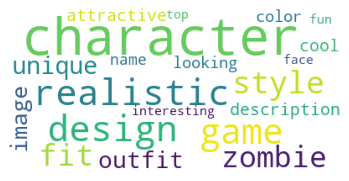

In [116]:
# word cloud with the most used words

wc = WordCloud(background_color = 'white',max_words = 20)
wordcloud = wc.generate(word_cloud)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### NLP:N-Grams
we'll look into bigram, trigram, fourgram


In [117]:
pickfu_text_review= pickfu_r['review_nonsense']
pickfu_text_review = pickfu_text_review.to_string().split(",")

In [118]:
# 2 n-grams
bigrams_series = (pd.Series(nltk.ngrams(pickfu_text_review
                       , 2)).value_counts())[:30]

Text(0.5, 0, '# of Occurances')

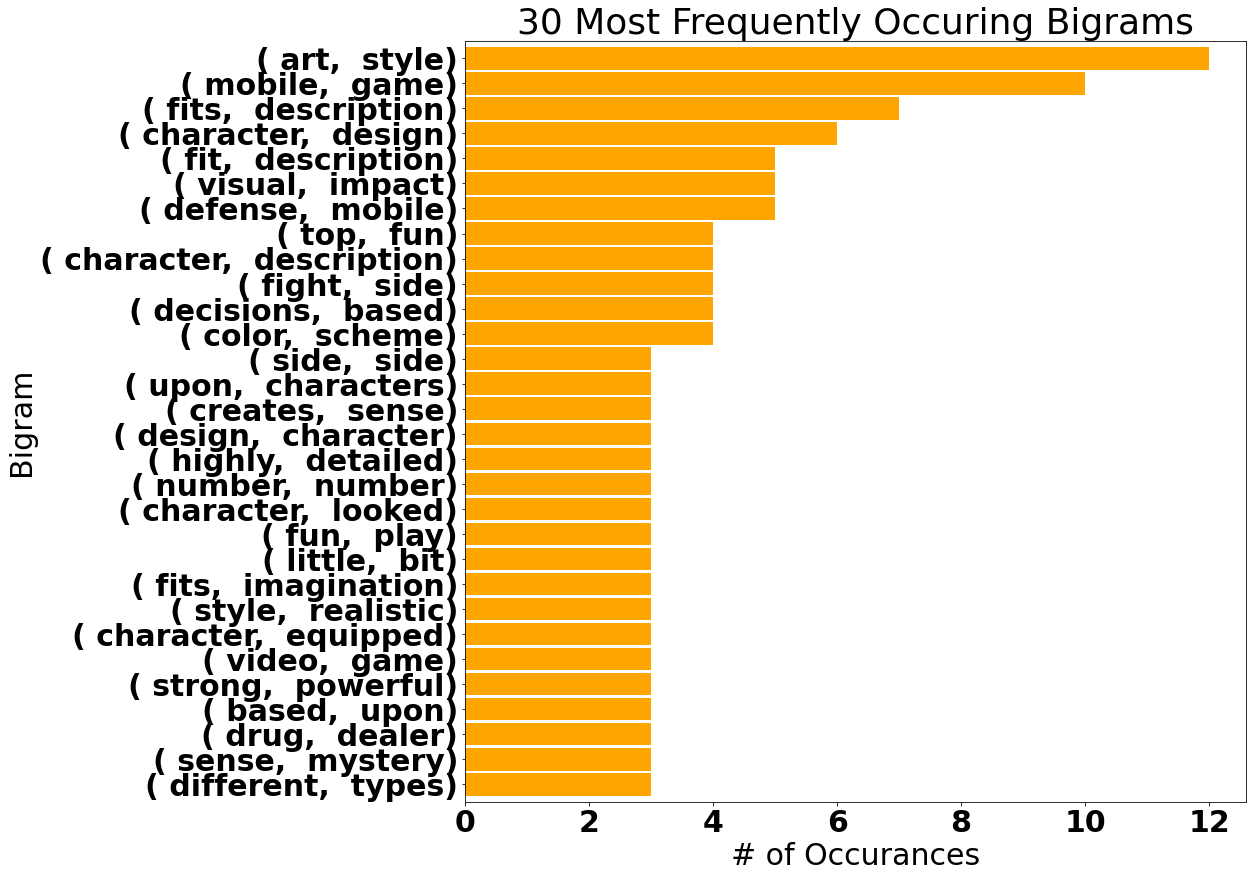

In [119]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
bigrams_series.sort_values().plot.barh(color='orange', width=.9, figsize=(14, 14))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

#### 值得关注的词组：
- art style
- mobile game
- fits desciption/ character description
- visual impact

In [ ]:
# 还可以看3个词一组，四个词一组
trigrams_series =(pd.Series(nltk.ngrams(pickfu_text_review
                       , 3)).value_counts())[:30]
#trigrams_series

In [ ]:
trigrams_series.sort_values().plot.barh(color='orange', width=.9, figsize=(14, 14))
plt.title('30 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

#### ！这一部分后续可以看最多一同出现的词组，和不同的词组最常对应什么样的单词，但要继续扩大dataset，这里的dataset 1242条

### unsupervised machine learning

data cleaning

In [124]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.stem.wordnet import WordNetLemmatizer

In [125]:
#create a list of stop words
stop_words = set(stopwords.words("english"))
#show how many words are in the list of stop words
print(len(stop_words))
#179
#construct a new list to store the cleaned text
clean_desc = []
for w in range(len(pickfu_r.Explanation)):
    desc = pickfu_r['Explanation'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    split_text = desc.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words and len(word) >2] 
    split_text = " ".join(split_text)
    clean_desc.append(split_text)

179


vectorizing with tf-idf

In [126]:
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform(clean_desc)
#returns a list of words.
words = tfv.get_feature_names()
print(vec_text.shape)

(1242, 3073)


/Users/cecilia/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Tuning Parameters
- Checking k in range(5,50)
- Silhouette score should be high and sse and inertia should face sudden change in slope
- Decide on the number of clusters

In [127]:
SSEs = []
Sil_coefs = []
for k in range(5,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(vec_text)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(vec_text, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

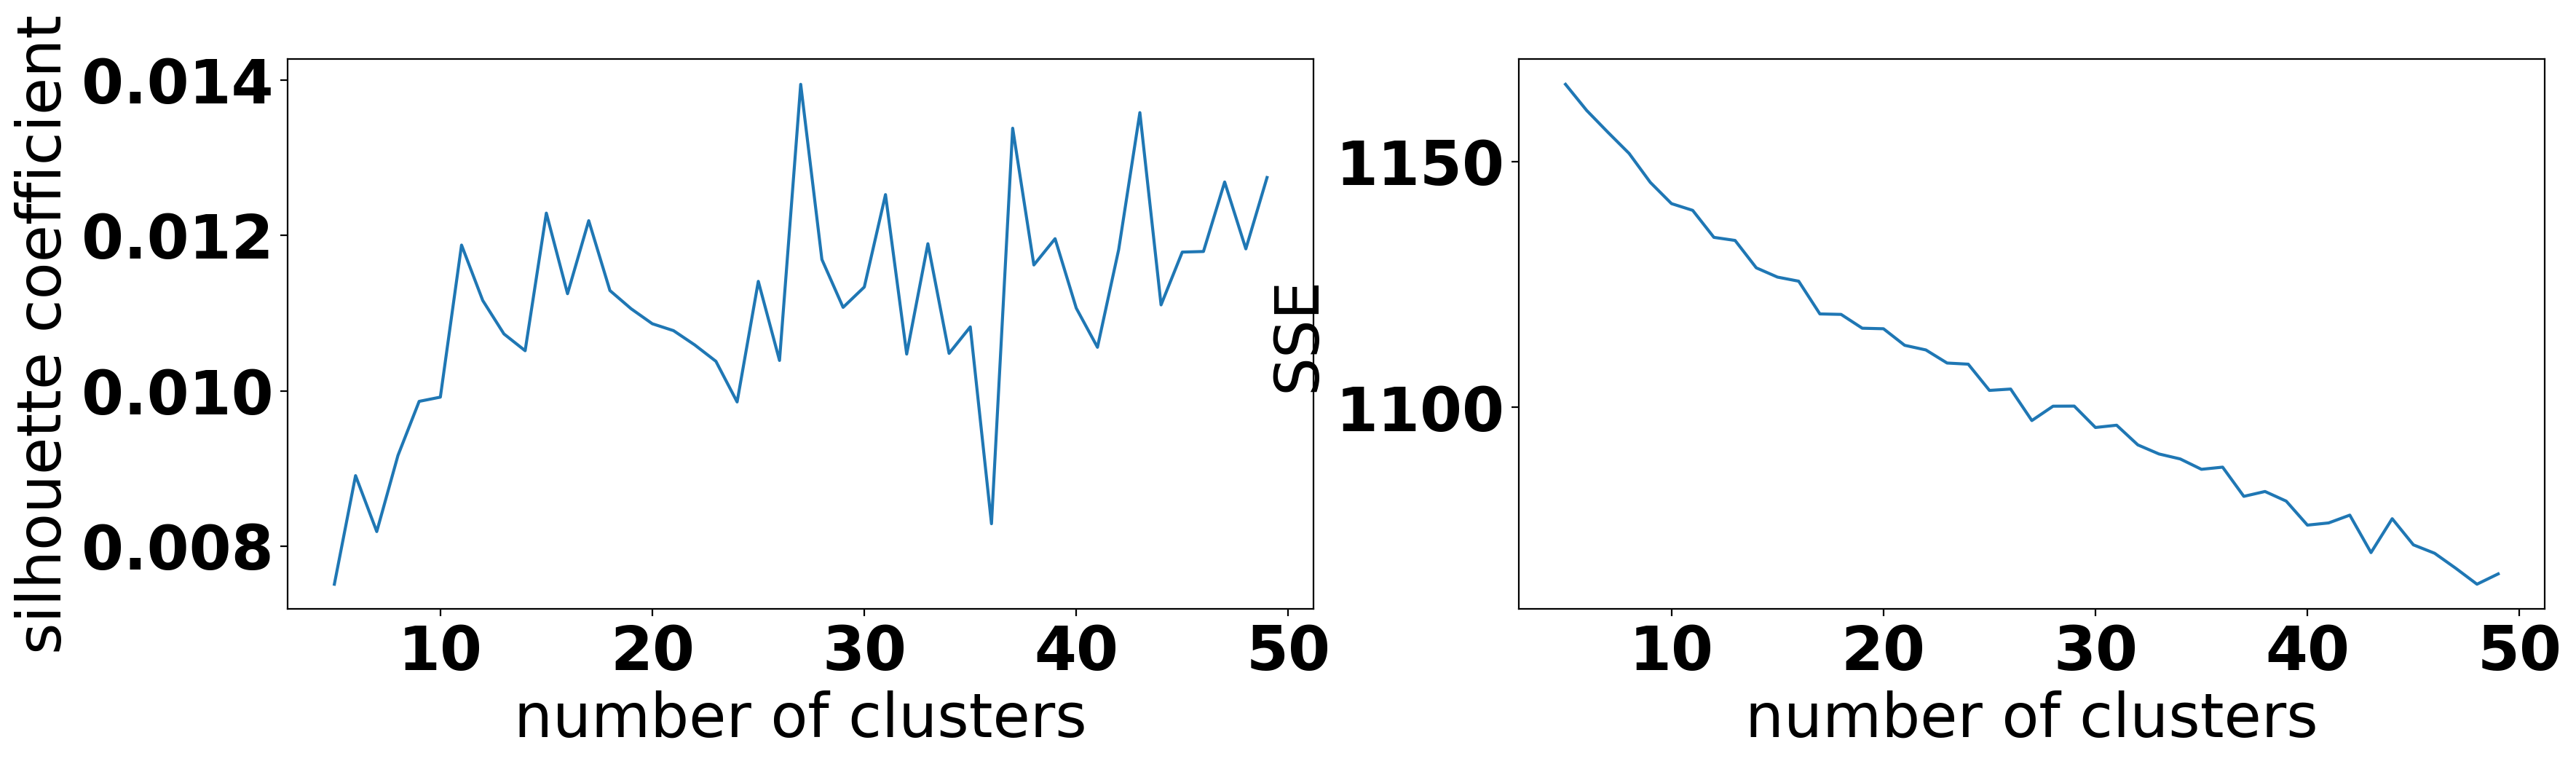

In [130]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5), sharex=True, dpi=200)
k_clusters = range(5,50)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [ ]:
inertia = [0,0]

for n_clusters in range(2, 50):
    km = KMeans(n_clusters = n_clusters)
    km.fit(vec_text)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

Text(0, 0.5, 'inertia scores')

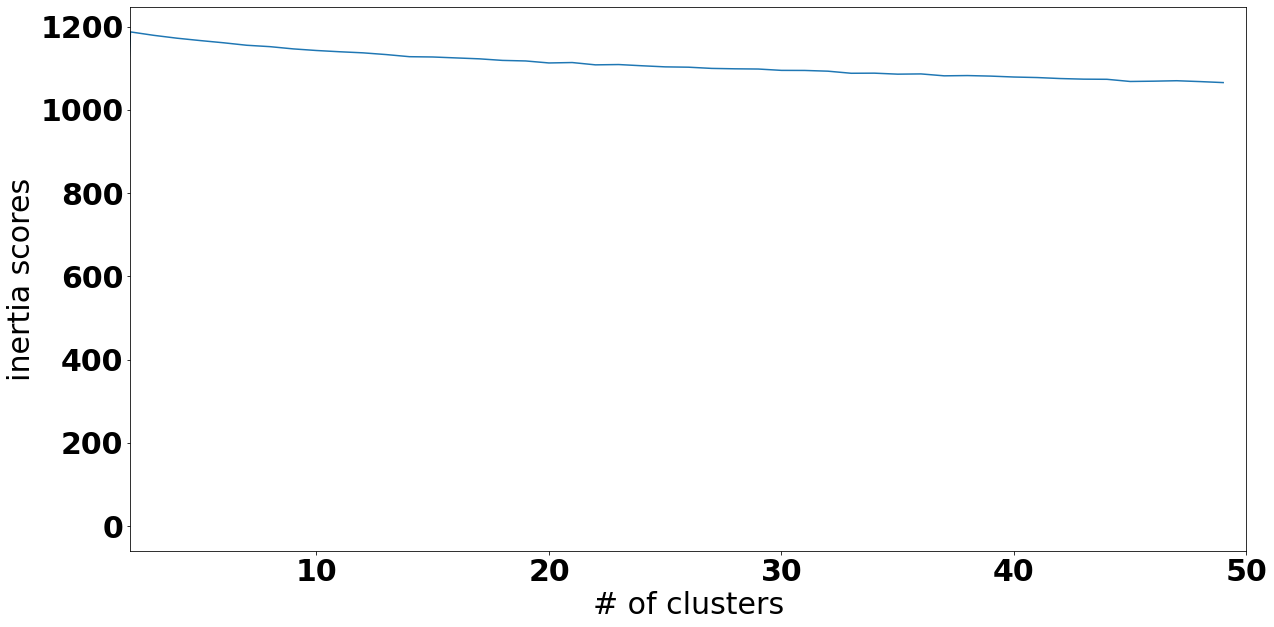

In [132]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,50))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

k= 28 的时候，silhouette score最大
后续可能需要扩大dataset, silhouette score还不够大

### k-means clustering
把类似的review group在一起

In [ ]:
# running cluster
k = 32
kmeans = KMeans(n_clusters=k, random_state=1, init= 'k-means++', verbose= 1)
kmeans.fit(vec_text)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfv.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

可以check各个cluster

In [136]:
#check cluster 0
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:10]:
    print(rev_index, str(pickfu_r.Explanation[rev_index]))
    print("\n")

117 honestly i chose a because it's the only picture that does not kind of creep me out.  the other two look very strange with the arms cut off the way they are.  i realize that a has that too but it is angled so it does not look like it as much.


303 i prefer option a because the lack of the weird outline on the trees makes this look much more realistic.


312 i like the paper cut out look with the outlines on the trees, it is very stylish.


324 choice a has more realistic backgrounds. choice b's backgrounds look like they are artificial or made from paper mache.


325 i prefer the darker outlines of the trees, and buildings.


342 i like this more, the other has those weird outlines that just give it a weird sort of look i do not care for


899 i prefer the cartoony-yet-realistic look of e. it's balanced and very stylish. people love the movie that featured that art style as well, so it would be nostalgic.


1000 option d is still expressive while being stylish and not having the c

reducing dimensions and scaling

In [137]:
# Reduced dimensions
n_comp = 10
lsa_tfidf = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)


# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(vec_text)
nmf_tfidf_data = nmf_tfidf.fit_transform(vec_text)

In [138]:
# import standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)

### topic modeling

In [139]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [140]:
display_topics2(lsa_tfidf, tfv.get_feature_names(),10)


Topic 0
like (0.3910), look (0.3887), option (0.3771), character (0.2488), would (0.1744), think (0.1713), choice (0.1643), best (0.1480), game (0.1274), design (0.1263)

Topic 1
option (0.5312), character (0.3153), design (0.2218), prefer (0.1505), description (0.0967), style (0.0947), best (0.0850), choice (0.0786), attractive (0.0731), appealing (0.0701)

Topic 2
choice (0.5952), top (0.1669), game (0.1365), description (0.1344), based (0.1323), fit (0.1229), name (0.1109), one (0.1001), outfit (0.0995), appealing (0.0956)

Topic 3
look (0.4500), choice (0.2341), character (0.2260), realistic (0.1714), appealing (0.1076), design (0.0938), top (0.0797), style (0.0689), prefer (0.0664), cool (0.0638)

Topic 4
character (0.4807), best (0.2652), description (0.2599), fit (0.2265), think (0.2224), well (0.1287), feel (0.1251), like (0.0812), attractive (0.0728), match (0.0691)

Topic 5
realistic (0.4290), style (0.2755), prefer (0.2468), character (0.2412), game (0.2216), feel (0.2135),

/Users/cecilia/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
display_topics2(nmf_tfidf, tfv.get_feature_names(),10)

以上是目前能看到不同的key topics:
- design style
- desciption
- character design
- zombie (这个可能是因为目前dataset中大部分是调研zombie game/世界观)
- 可能继续深入的形容词：realistic, attractive等

### clustering: NMF

In [142]:
SSEs = []
Sil_coefs = []
for k in range(5,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

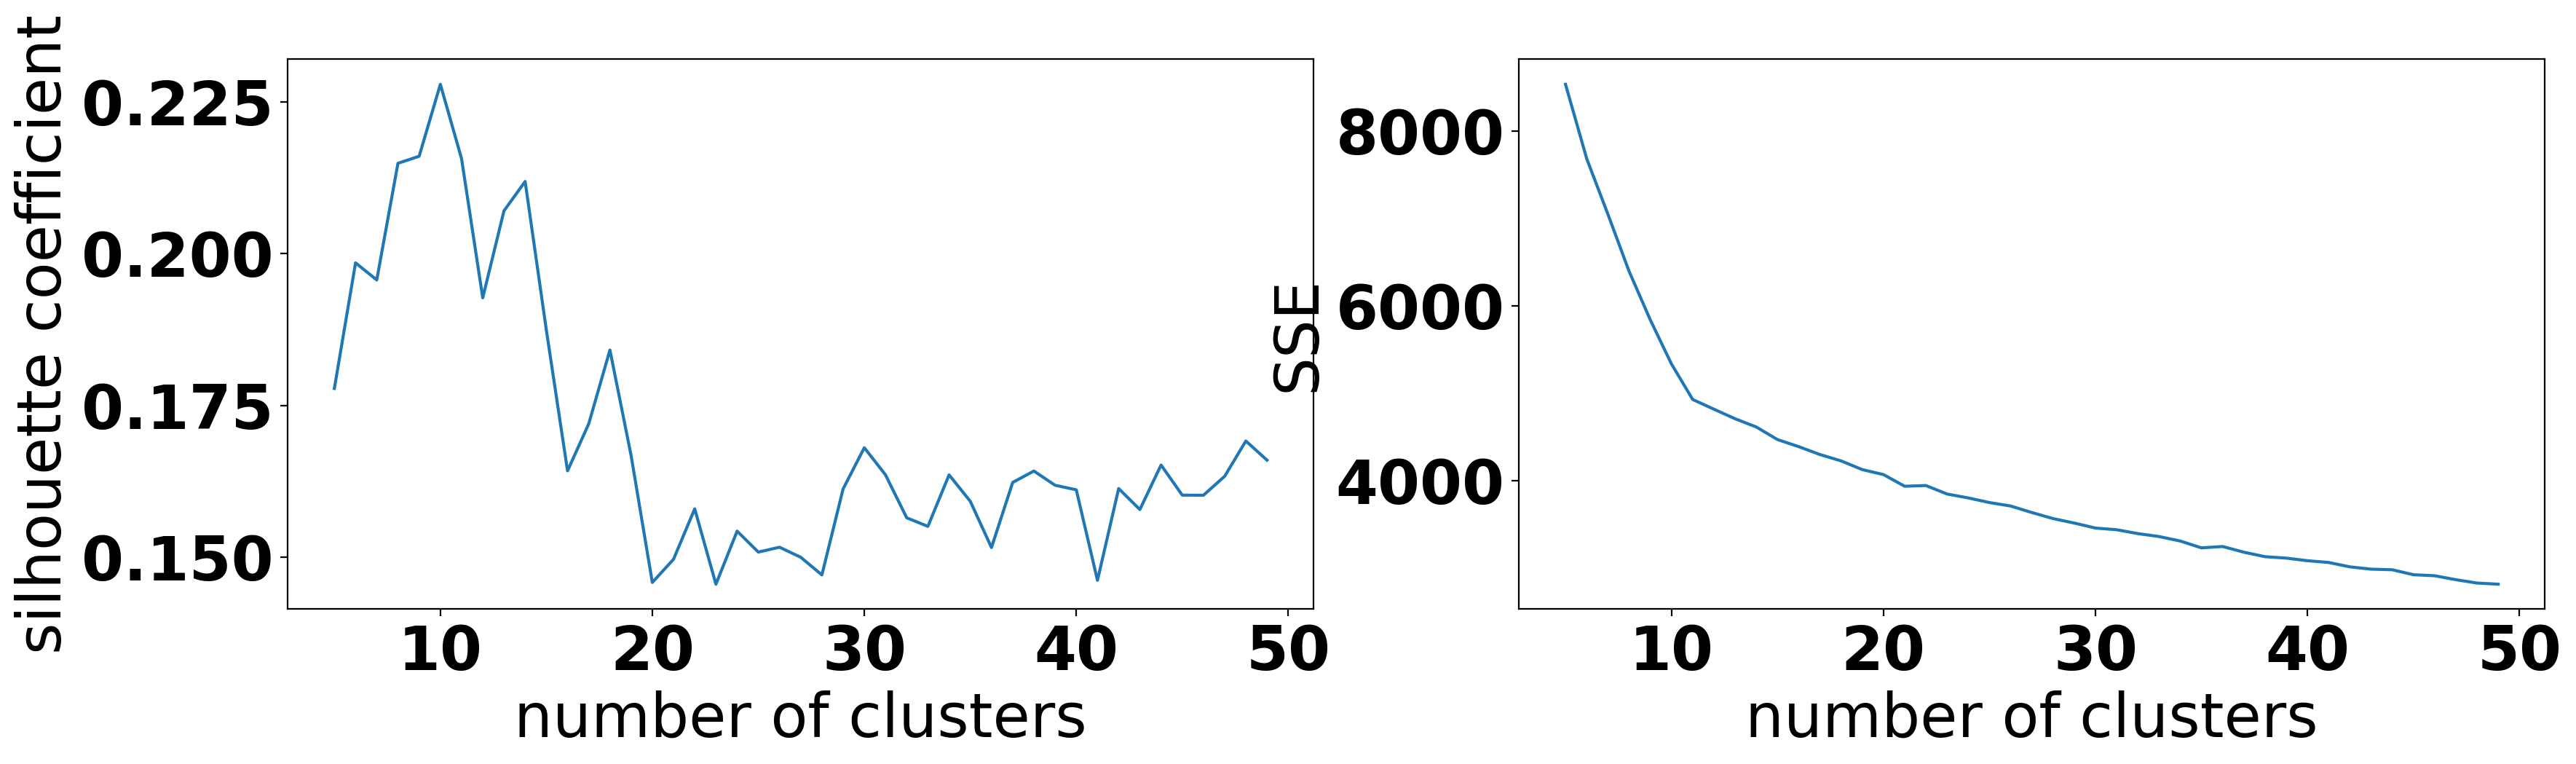

In [144]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5), sharex=True, dpi=200)
k_clusters = range(5,50)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [ ]:
inertia = [0,0]

for n_clusters in range(2, 50):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

Text(0, 0.5, 'inertia scores')

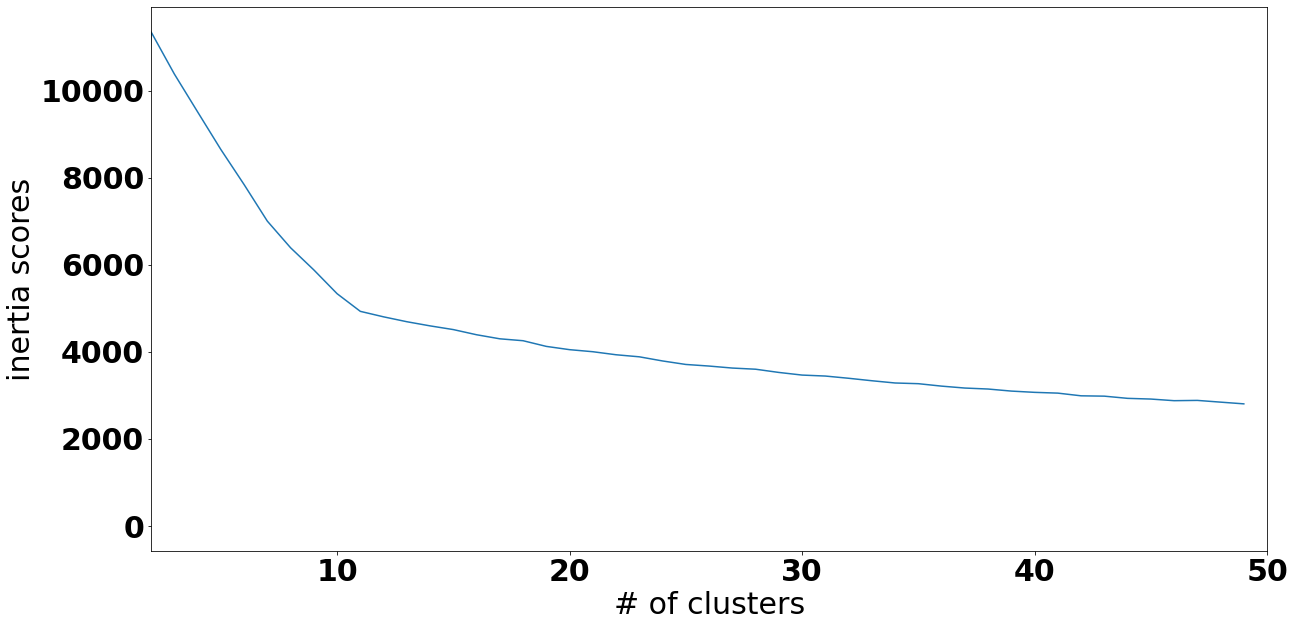

In [146]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,50))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [ ]:
# running cluster
k = 10
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfv.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

In [149]:
#check cluster 0
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(pickfu_r.Explanation[rev_index]))
    print("\n")

9 scientist would not likely be an expert with bows or crossbows.  thus, i would expect him to use a rifle.


44 choice a is the one that i really fits the description the best because i like the eye scouter thing that he is wearing as it fits to me with him being a research and scientific genius that he would want something like that to help enhance him when he has to fight. i also feel like the outfit fits the best for someone who seems like they would fight at ranged stealth. choice b is second because the wrist crossbow struck me as a weapon that someone who is a genius would have made and would be the only one to use. his look also comes off as being someone with his personality. choice d is third because i like that he uses the crossbow like the first two as that fits with the character to me but everything else does not fit. his outfit and stance here does not strikes me as socially anxious genius. choice c is last because i do not like that he uses a gun and his look here comes

#### 总的来说有两种用法：
- 可以把分组交叉用户年龄组/喜欢的游戏种类，看每个组的人关注什么
- 还得扩大dataset，可以看所有用户喜欢看的topic是什么